# Creating University Program Curriculumn based on Clustering of Skills in Job Postings  (Assignment 3 template)


### Import Python libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import requests
import matplotlib as plt
import matplotlib.pyplot as plt
import openai
import re
%matplotlib inline
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

In [5]:
## Machine Learning libraries
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import openai
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import euclidean
from scipy.cluster.hierarchy import ClusterWarning
from warnings import simplefilter
simplefilter("ignore", ClusterWarning)


# 1. Load job postings web-scraped from Indeed.com

In [6]:
#file1 = r'/Users/xinle/Desktop/UofT 2024 Fall/MIE 1624/Assignment 3/Python Analyst.csv'
#file2 = r'/Users/xinle/Desktop/UofT 2024 Fall/MIE 1624/Assignment 3/DA.csv'
#file3 = r'/Users/xinle/Desktop/UofT 2024 Fall/MIE 1624/Assignment 3/DS.csv'
#file4 = r'/Users/xinle/Desktop/UofT 2024 Fall/MIE 1624/Assignment 3/BA.csv'

# Combine the data into a single dataset
#data1 = pd.read_csv(file1)
#data2 = pd.read_csv(file2)
#data3 = pd.read_csv(file3)
#data4 = pd.read_csv(file4)
#data = pd.concat([data1, data2, data3, data4], ignore_index=True)
#print(data)
#data.to_csv('Data.csv', index=False)

In [ ]:
# Showing the web scraping data
results = pd.read_csv('webscraping_results_assignment3.csv')

# Showing the shape of the data
print(results.shape)

(987, 8)


In [8]:
# Showing the data
print(results.head(5))

# Showing the columns of the data
print(results.columns)

                                               Title  \
0  Software Analyst Intern (C or C++, Python, Jav...   
1                               Analyst or Associate   
2  Actuarial Analyst, Commercial Insurance - Pricing   
3                  Technology Analyst Program | 2025   
4      Business System Analyst - SQL, Sybase, Python   

                          Company                    Location  Rating Date  \
0                          Thales                 Toronto, ON     NaN  NaN   
1         National Bank of Canada         Toronto, ON M5X 1J9     NaN  NaN   
2  Definity Financial Corporation  Hybrid work in Toronto, ON     NaN  NaN   
3                 Bank of America                 Toronto, ON     NaN  NaN   
4                      AstraNorth  Hybrid work in Toronto, ON     NaN  NaN   

                    Salary                                        Description  \
0                      NaN  About Us\nA career at Hitachi Rail will help c...   
1                      NaN  A ca

In [9]:
# Removing duplicates
results = results.drop_duplicates()

In [10]:
# Showing the shape of the data after removing duplicates
print(results.shape)

(987, 8)


# 2. Extract skills from job postings

Replace with your own classification of skills. You may use ChatGPT to generate Python code for extracting skills from job descriptions.

In [ ]:

# Initialize the OpenAI client
# Source https://stackoverflow.com/questions/77505030/openai-api-error-you-tried-to-access-openai-chatcompletion-but-this-is-no-lon
# API key is stored in the environment variable OPENAI_API_KEY
client = openai(
    api_key = os.getenv('OPENAI_API_KEY'),
)

def ChatGPT_conversation(conversation, model_id='gpt-3.5-turbo'):
    response = client.chat.completions.create(
        model=model_id,
        messages=conversation
    )
    return response


In [ ]:
conversation = []
conversation.append({'role': 'system', 'content': 'Would you please think of skills that are required for the position of Data Analyst/Science or Business Analyst, and give me a single python list consist all key phrases of the skills?'})
response = ChatGPT_conversation(conversation)
conversation.append({'role': response.choices[0].message.role, 'content': response.choices[0].message.content})
print('{0}: {1}\n'.format(conversation[-1]['role'].strip(), conversation[-1]['content'].strip()))

assistant: Certainly! Here is a python list consisting of key phrases for skills required for the positions of Data Analyst/Science or Business Analyst:

```python
skills_required = [
    "Statistical analysis",
    "Data visualization",
    "SQL",
    "Python",
    "R programming",
    "Machine learning",
    "Data manipulation",
    "Problem-solving",
    "Critical thinking",
    "Communication skills",
    "Data modeling",
    "Data mining",
    "Quantitative analysis",
    "Predictive analytics",
    "Excel",
    "Business intelligence",
    "Hadoop",
    "Tableau",
    "Big data",
    "ETL process",
    "Data warehousing",
    "Experimental design",
    "Hypothesis testing",
    "Data cleaning",
    "Data interpretation"
]
``` 
You can use this list for reference when looking for candidates with these skills for the positions of Data Analyst/Science or Business Analyst.



In [ ]:
conversation = []
conversation.append({'role': 'system', 'content': 'Would you please think of programming skills that are required for the position of Data Analyst/Science or Business Analyst, and give me a single python list consist all key phrases of the skills?'})
response = ChatGPT_conversation(conversation)
conversation.append({'role': response.choices[0].message.role, 'content': response.choices[0].message.content})
print('{0}: {1}\n'.format(conversation[-1]['role'].strip(), conversation[-1]['content'].strip()))

assistant: Sure! Here is a single Python list consisting of key phrases of the programming skills required for the position of Data Analyst/Science or Business Analyst:

["Python", "SQL", "R", "Java", "C++", "Matlab", "SAS", "Excel", "Pandas", "NumPy", "Scikit-learn", "TensorFlow", "Keras", "MLlib", "Hadoop", "Spark", "Tableau", "PowerBI", "Data Visualization", "Machine Learning", "Statistical Analysis", "Data Mining", "ETL", "Data Cleaning", "Data Wrangling"]



In [ ]:
conversation = []
conversation.append({'role': 'system', 'content': 'Would you please think of Technical, data-related, modeling/algorithms skills that are required for the position of Data Analyst/Science or Business Analyst, and give me a single python list consist all key phrases of the skills?'})
response = ChatGPT_conversation(conversation)
conversation.append({'role': response.choices[0].message.role, 'content': response.choices[0].message.content})
print('{0}: {1}\n'.format(conversation[-1]['role'].strip(), conversation[-1]['content'].strip()))

assistant: Sure! Here is a python list containing key phrases of the skills required for the position of Data Analyst/Science or Business Analyst:

skills = ['Data Analysis', 'Statistical Analysis', 'Data Modeling', 'Data Visualization', 'Machine Learning', 'Big Data', 'SQL', 'Python', 'R', 'Excel', 'Hadoop', 'Predictive Modeling', 'Natural Language Processing', 'Deep Learning', 'Data Mining', 'Business Intelligence', 'Tableau', 'Power BI', 'Spark', 'ETL', 'Algorithm Development', 'Quantitative Analysis', 'Time Series Analysis', 'Regression Analysis']



In [ ]:
conversation = []
conversation.append({'role': 'system', 'content': 'Would you please think of Business intelligence, project management, consulting, negotiation skills that are required for the position of Data Analyst/Science or Business Analyst, and give me a single python list consist all key phrases of the skills?'})
response = ChatGPT_conversation(conversation)
conversation.append({'role': response.choices[0].message.role, 'content': response.choices[0].message.content})
print('{0}: {1}\n'.format(conversation[-1]['role'].strip(), conversation[-1]['content'].strip()))

assistant: ["Business intelligence", "Project management", "Consulting", "Negotiation skills", "Data analysis", "Data science", "Business analysis", "Python programming", "Statistical modeling", "Machine learning", "Data visualization", "Database management", "Critical thinking", "Problem-solving", "Communication skills", "Teamwork", "Attention to detail"]



In [ ]:
conversation = []
conversation.append({'role': 'system', 'content': 'Would you please think of Teamwork and communication skills that are required for the position of Data Analyst/Science or Business Analyst, and give me a single python list consist all key phrases of the skills?'})
response = ChatGPT_conversation(conversation)
conversation.append({'role': response.choices[0].message.role, 'content': response.choices[0].message.content})
print('{0}: {1}\n'.format(conversation[-1]['role'].strip(), conversation[-1]['content'].strip()))

assistant: - Collaboration
- Active listening
- Conflict resolution
- Problem-solving
- Clear communication
- Cross-functional team work
- Peer feedback
- Decision-making
- Adaptability
- Project management



In [ ]:
## Programming/systems skills
sskills = {}
sskills['Python'] = []
sskills['Matlab'] = []
sskills['R'] = []
sskills['Java'] = []
sskills['SAS'] = []
sskills['SQL'] = []
sskills['Excel'] = []
sskills['C++'] = [] 

## Visualization tools
vskills = {}
vskills['Tableau'] = []
vskills['PowerBI'] = []
vskills['VBS']  = []

## Technical, data-related, modeling/algorithms skills
tskills = {}
tskills['Data Management'] = []
tskills['Big Data'] = []
tskills['Machine Learning'] = []
tskills['Data Cleaning'] = []
tskills['Feature Engineering'] = []
tskills['Modeling'] = []
tskills['Data Mining'] = []
tskills['Data Wrangling'] = []
tskills['ETL'] = []
tskills['Risk Management'] = []


## Business intelligence, project management, consulting, negotiation skills
bskills = {}
bskills['Project Management'] = []
bskills['Consulting'] = []
bskills['Negotiation Skills'] = []
bskills['Business Intelligence'] = []
bskills['Data visualization'] = []
bskills['Decision Making'] = []
bskills['Client Relations'] = []
bskills['Budgeting'] = []
bskills['Reporting'] = []

## Teamwork and communication skills
pskills = {}
pskills['Collaboration'] = []
pskills['Teamwork'] = []
pskills['Creativity'] = []
pskills['Communication'] = []
pskills['Conflict Resolution'] = []
pskills['Presentation'] = []
pskills['Adaptability'] = []
pskills['Leadership'] = []
pskills['Problem Solving'] = []
pskills['Critical Thinking'] = []
pskills['Interpersonal Skills'] = []
pskills['Time Management'] = []

## Extracting skills from the job descriptions
for ir, dfr in results.iterrows():
    cleantext = str(dfr["Description"]).lower()

    # Programming/systems skills
    sskills['Python'].append('1' if "python" in cleantext else '0')
    sskills['Matlab'].append('1' if "matlab" in cleantext else '0')
    
    # Ensure accurate detection for 'R' as a standalone word
    if (" r " in cleantext or " r," in cleantext or " r." in cleantext or 
        " r/" in cleantext or "/r " in cleantext):
        sskills['R'].append('1')
    else:
        sskills['R'].append('0')
    
    sskills['Java'].append('1' if "java" in cleantext else '0')
    sskills['SAS'].append('1' if "sas" in cleantext else '0')
    sskills['SQL'].append('1' if ("sql" in cleantext or "structured query language" in cleantext) else '0')
    sskills['Excel'].append('1' if "excel" in cleantext else '0')
    sskills['C++'].append('1' if ("c++" in cleantext or "c plus plus" in cleantext) else '0')

    # Visualization tools
    vskills['Tableau'].append('1' if "tableau" in cleantext else '0')
    vskills['PowerBI'].append('1' if ("powerbi" in cleantext or "power bi" in cleantext) else '0')
    vskills['VBS'].append('1' if ("vbs" in cleantext or "visual basic script" in cleantext) else '0')  # Added VBS extraction

    # Technical, data-related, modeling/algorithms skills
    if ("data management" in cleantext or "data engineer" in cleantext or 
        "database" in cleantext or "data handling" in cleantext or "data processing" in cleantext):
        tskills['Data Management'].append('1')
    else:
        tskills['Data Management'].append('0')
    
    tskills['Big Data'].append('1' if "big data" in cleantext else '0')
    tskills['Machine Learning'].append('1' if "machine learning" in cleantext else '0')
    if ("data cleaning" in cleantext or "data cleansing" in cleantext or "clean data" in cleantext):
        tskills['Data Cleaning'].append('1')
    else:
        tskills['Data Cleaning'].append('0')
    
    tskills['Feature Engineering'].append('1' if "feature engineering" in cleantext else '0')
    if ("modeling" in cleantext or "model" in cleantext):
        tskills['Modeling'].append('1')
    else:
        tskills['Modeling'].append('0')
    
    tskills['Data Mining'].append('1' if "data mining" in cleantext else '0')  # Added Data Mining
    tskills['Data Wrangling'].append('1' if "data wrangling" in cleantext else '0')  # Added Data Wrangling
    tskills['ETL'].append('1' if "etl" in cleantext else '0')  # Added ETL
    tskills['Risk Management'].append('1' if "risk management" in cleantext else '0')  # Added Risk Management

    # Business intelligence, project management, consulting, negotiation skills
    if ("project management" in cleantext or "project manager" in cleantext):
        bskills['Project Management'].append('1')
    else:
        bskills['Project Management'].append('0')
    
    if ("consulting" in cleantext or "consultant" in cleantext):
        bskills['Consulting'].append('1')
    else:
        bskills['Consulting'].append('0')
    
    if ("negotiation skills" in cleantext or "negotiation" in cleantext or "negotiate" in cleantext):
        bskills['Negotiation Skills'].append('1')
    else:
        bskills['Negotiation Skills'].append('0')
    
    bskills['Business Intelligence'].append('1' if "business intelligence" in cleantext else '0')  # Added Business Intelligence
    bskills['Data visualization'].append('1' if "data visualization" in cleantext else '0')  # Added Data visualization
    bskills['Decision Making'].append('1' if "decision making" in cleantext else '0')  # Added Decision Making
    bskills['Client Relations'].append('1' if "client relations" in cleantext else '0')  # Added Client Relations
    bskills['Budgeting'].append('1' if "budgeting" in cleantext else '0')  # Added Budgeting
    bskills['Reporting'].append('1' if "reporting" in cleantext else '0')  # Added Reporting

    # Teamwork and communication skills
    pskills['Teamwork'].append('1' if ("teamwork" in cleantext or "team work" in cleantext or "team player" in cleantext) else '0')
    pskills['Creativity'].append('1' if ("creativity" in cleantext or "creative" in cleantext) else '0')
    pskills['Communication'].append('1' if ("communication" in cleantext or "communicate" in cleantext) else '0')
    if ("conflict resolution" in cleantext or "resolve conflicts" in cleantext or 
        "conflict management" in cleantext):
        pskills['Conflict Resolution'].append('1')
    else:
        pskills['Conflict Resolution'].append('0')
    
    pskills['Leadership'].append('1' if ("leadership" in cleantext or "leader" in cleantext) else '0')
    if ("problem solving" in cleantext or "problem-solving" in cleantext or "solve problems" in cleantext):
        pskills['Problem Solving'].append('1')
    else:
        pskills['Problem Solving'].append('0')
    
    pskills['Critical Thinking'].append('1' if "critical thinking" in cleantext else '0')
    pskills['Interpersonal Skills'].append('1' if ("interpersonal skills" in cleantext or "interpersonal" in cleantext) else '0')
    pskills['Time Management'].append('1' if ("time management" in cleantext or "manage time" in cleantext) else '0')
    
    # Added Personal Skills
    pskills['Collaboration'].append('1' if ("collaboration" in cleantext or "collaborate" in cleantext) else '0')
    pskills['Presentation'].append('1' if ("presentation" in cleantext or "presenting" in cleantext) else '0')
    pskills['Adaptability'].append('1' if ("adaptability" in cleantext or "adaptable" in cleantext) else '0')


In [ ]:
## Create dataframe with extracted skills (1 if a skill was found in job description, 0 if a skills was not found in job description)
df1 = results[['Title', 'Company', 'Location', 'Description']].copy()
df2 = pd.DataFrame(sskills)
df3 = pd.DataFrame(vskills)
df4 = pd.DataFrame(tskills)
df5 = pd.DataFrame(bskills)
df6 = pd.DataFrame(pskills)
frames = [df1, df2, df3, df4, df5, df6]
res = pd.concat(frames, axis = 1)
res.head()

,Title,Company,Location,Description,Python,Matlab,R,Java,SAS,SQL,...,Creativity,Communication,Conflict Resolution,Presentation,Adaptability,Leadership,Problem Solving,Critical Thinking,Interpersonal Skills,Time Management
0,"Software Analyst Intern (C or C++, Python, Jav...",Thales,"Toronto, ON",About Us\nA career at Hitachi Rail will help c...,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
1,Analyst or Associate,National Bank of Canada,"Toronto, ON M5X 1J9",A career as an Analyst or Associate in the Glo...,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0
2,"Actuarial Analyst, Commercial Insurance - Pricing",Definity Financial Corporation,"Hybrid work in Toronto, ON","Economical is part of Definity, which includes...",1,0,1,0,1,0,...,0,1,0,0,1,1,0,0,0,0
3,Technology Analyst Program | 2025,Bank of America,"Toronto, ON",Java Technology Analyst/Developer\nBank of Ame...,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
4,"Business System Analyst - SQL, Sybase, Python",AstraNorth,"Hybrid work in Toronto, ON",Experience (Years): 10 & Above\nEssential Skil...,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


#### Visulize


In [ ]:
# Define a function to plot the frequencies of the skills
def plot_skill_frequencies(df, title):
    # Convert string indicators to numeric
    df_numeric = df.apply(pd.to_numeric)
    
    # Sum up the occurrences of each skill
    skill_counts = df_numeric.sum().sort_values(ascending=False)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x=skill_counts.values, y=skill_counts.index, palette='viridis')
    plt.title(title)
    plt.xlabel('Number of Job Descriptions')
    plt.ylabel('Skills')
    plt.tight_layout()
    plt.show()

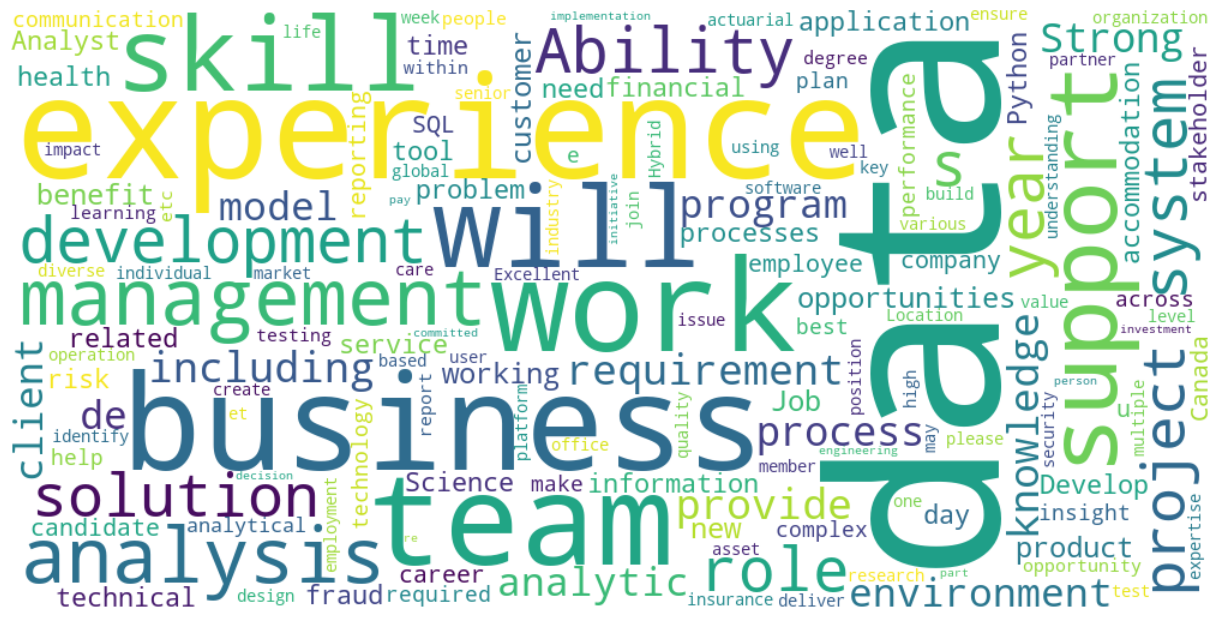

In [ ]:
# Concatenate all the text from the selected column into a single string
all_text = ' '.join(results['Description'].dropna().tolist())  # Ensure no NaN values

# Create the WordCloud object with enhanced settings
wordcloud = WordCloud(
    width=1000, 
    height=500, 
    background_color='white',  # White background for clean look
    colormap='viridis',        # Use a visually appealing colormap
    max_words=150,             # Display more words
    collocations=False,        # Avoid duplicate word combinations
    contour_width=1,           # Add a border contour
    contour_color='steelblue'  # Set contour color
).generate(all_text)

# Plot the WordCloud image
plt.figure(figsize=(12, 6))  # Larger size for better visibility
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axes for a clean look
plt.tight_layout(pad=0)
plt.show()

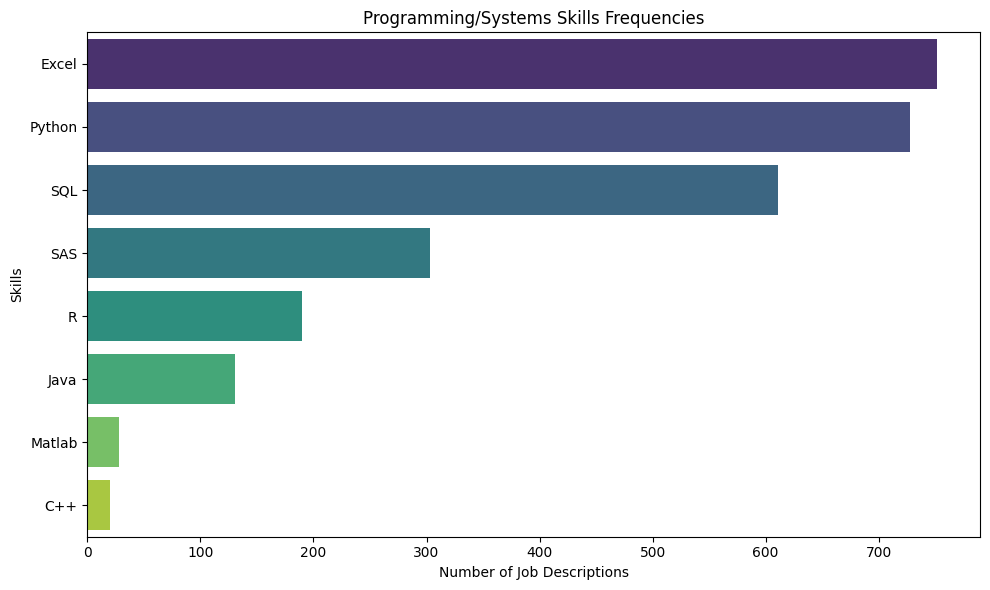

In [ ]:
# Plot the frequencies of the programming/systems skills
plot_skill_frequencies(df2, 'Programming/Systems Skills Frequencies')

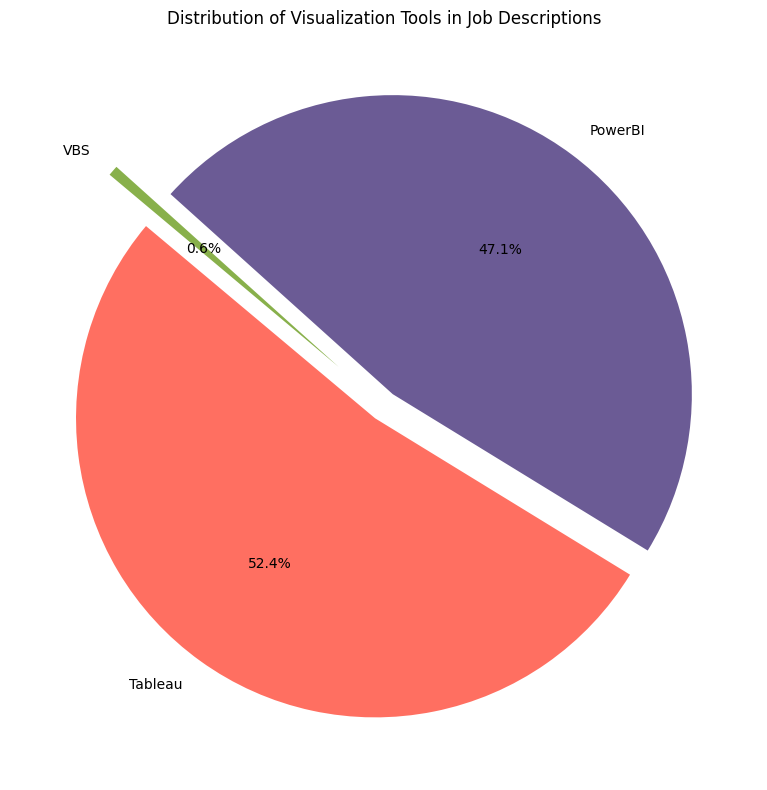

In [ ]:
# Data for visualization tools
vskills_counts = res[['Tableau', 'PowerBI', 'VBS']].astype(int).sum()

# Enhanced pie chart with modern colors
plt.figure(figsize=(8, 8))  # Set larger figure size for better readability
colors = ['#FF6F61', '#6B5B95', '#88B04B']  # Trendy, visually pleasing colors
explode = (0.05, 0.05, 0.2)  # Slightly explode each slice for emphasis

vskills_counts.plot.pie(
    autopct='%1.1f%%',  # Display percentages
    startangle=140,     # Start at a different angle for better layout
    colors=colors,      # Apply modern colors
    explode=explode,    # Explode slices for emphasis
    shadow=False,       # Remove shadow for a cleaner look
    title="Distribution of Visualization Tools in Job Descriptions"
)

plt.ylabel("")  # Remove y-axis label for better aesthetics
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

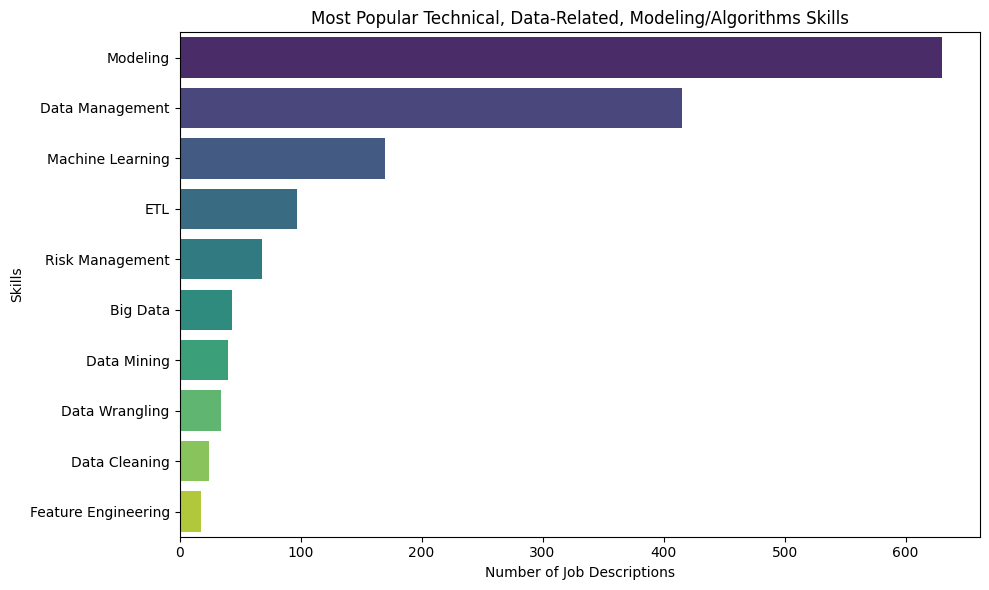

In [ ]:
# Plot the frequencies of the technical, data-related, modeling/algorithms skills
plot_skill_frequencies(df4, 'Most Popular Technical, Data-Related, Modeling/Algorithms Skills')

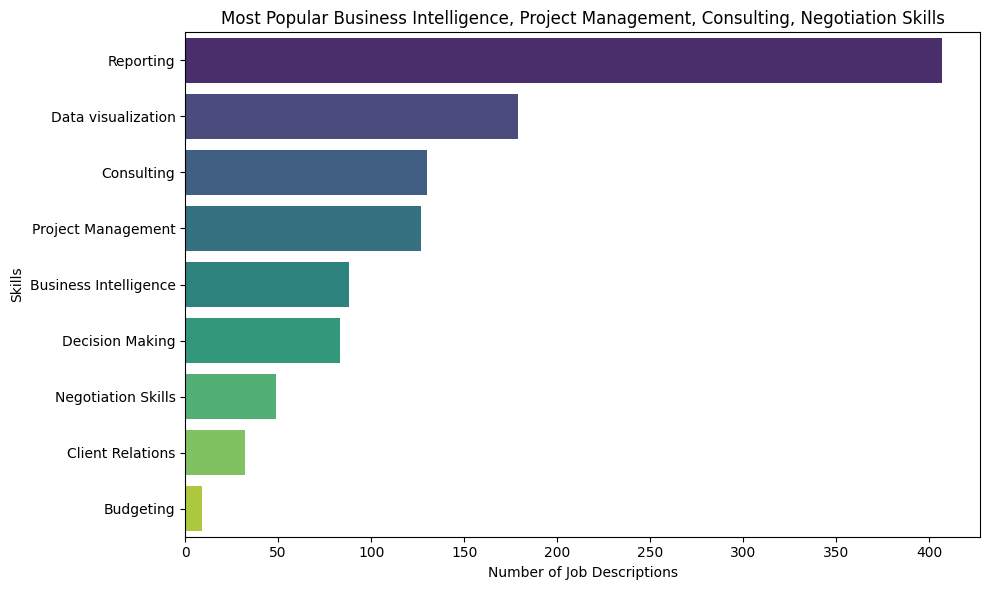

In [ ]:
# Plot the frequencies of the business intelligence, project management, consulting, negotiation skills
plot_skill_frequencies(df5, 'Most Popular Business Intelligence, Project Management, Consulting, Negotiation Skills')

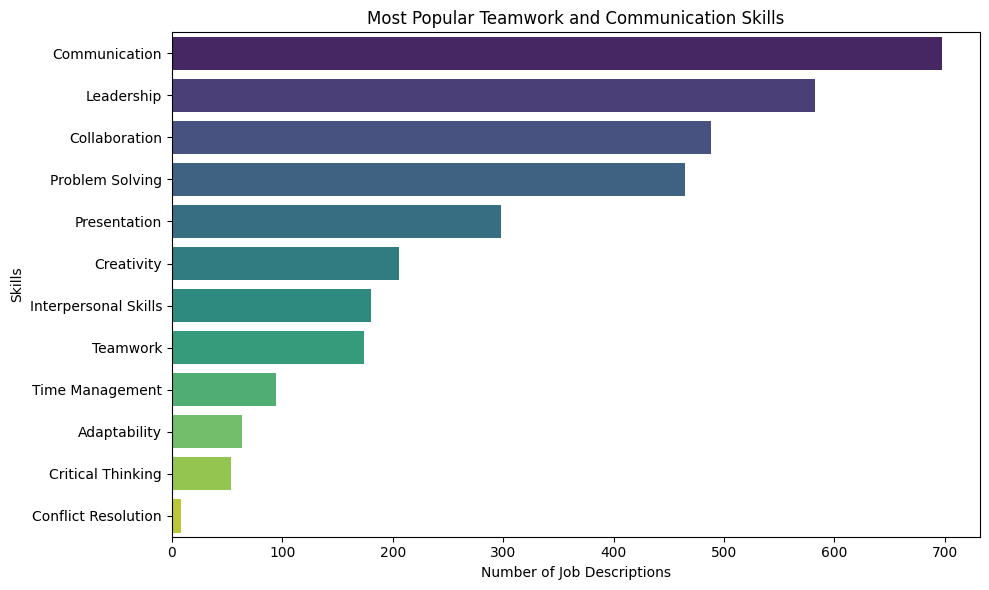

In [ ]:
# Plot the frequencies of the teamwork and communication skills
plot_skill_frequencies(df6, 'Most Popular Teamwork and Communication Skills')

In [ ]:
## Save skills as 2D array
df = res.iloc[:,4:]
df_summary = df.apply(pd.to_numeric)
a = df_summary.values

print("Number of job postings:", a.shape[0])
print(a)

Number of job postings: 987
[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 1 0]
 [1 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]


# 3. Hierarchical clustering of skills

Import Machine Learning libraries in Python

In [ ]:
## Create empty matrix to fill
D = np.zeros([a.shape[1],a.shape[1]])

## Find all element-wise skill proximities (distances)
for k in range(a.shape[0]):
    for i in range(a.shape[1]):
        for j in range(a.shape[1]):
            if a[k,i] == 1 and a[k,j] == 1:
                D[i,j] = D[i,j] + 1

In [ ]:
## Creating Dendrogram for our data (Y is linkage matrix)
Y = sch.linkage(D, method='ward')

## You may try different methods

#Y = sch.linkage(D, method='complete')
#Y = sch.linkage(D, method='average')
#Y = sch.linkage(D, method='centroid')

[]

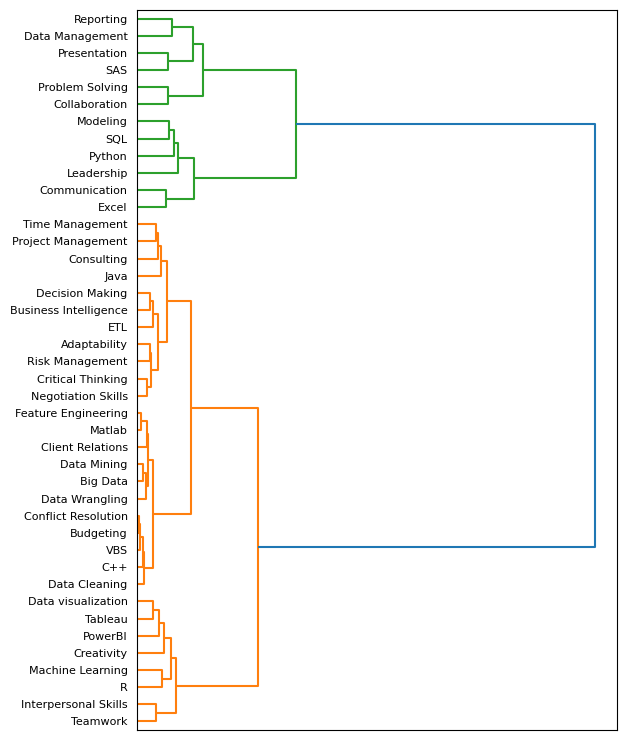

In [ ]:
## Plot dendrogram

fig = plt.figure(figsize=(12,12))
ax = fig.add_axes([0.1,0.1,0.4,0.6])

Z = sch.dendrogram(Y, orientation='right')
labels = df_summary.columns[Z['leaves']]
ax.set_xticks([])
ax.set_yticklabels(labels)

plt.savefig('dendrogram.png', format='png', bbox_inches='tight')
plt.plot()

### Print clusters for selected distance level

In [ ]:
## Cutting the dendrogram at max_d
max_d = 0.4

[]

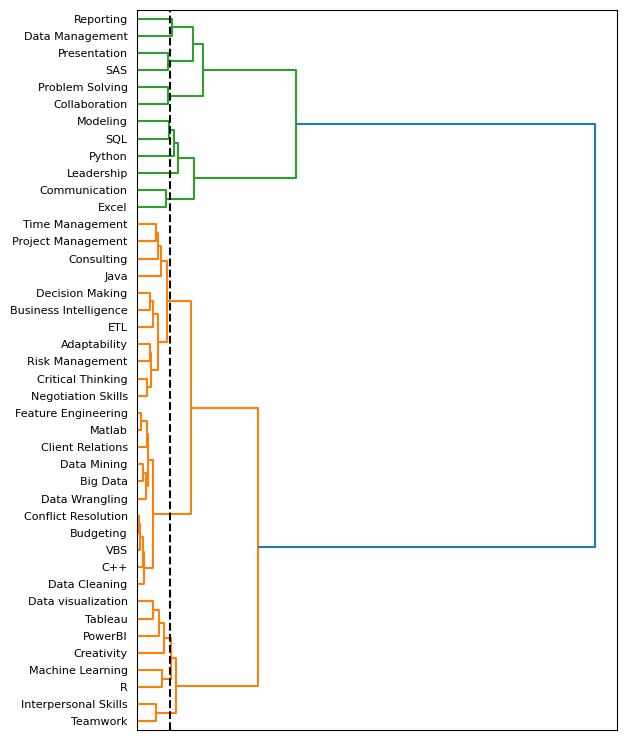

In [ ]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_axes([0.1,0.1,0.4,0.6])

Z = sch.dendrogram(Y, orientation='right')
labels = df_summary.columns[Z['leaves']]
ax.set_xticks([])
ax.set_yticklabels(labels)

# Cutting the dendrogram at max_d
plt.axvline(x=max_d*D.max(), c='k', linestyle='--')

plt.plot()

In [ ]:
## Identify clusters with max_d cut

lbs = sch.fcluster(Y, max_d*D.max(), 'distance')
clustr = lbs[Z['leaves']]

clust_skls = {}
for k in list(set(clustr)):
    clust_skls[k] = []

for j in range(len(labels)):
    clust_skls[clustr[j]].append(labels[j])

In [ ]:
for key, value in clust_skls.items():
    print(key, value)

1 ['Teamwork', 'Interpersonal Skills']
2 ['R', 'Machine Learning']
3 ['Creativity', 'PowerBI', 'Tableau', 'Data visualization']
4 ['Data Cleaning', 'C++', 'VBS', 'Budgeting', 'Conflict Resolution', 'Data Wrangling', 'Big Data', 'Data Mining', 'Client Relations', 'Matlab', 'Feature Engineering']
5 ['Negotiation Skills', 'Critical Thinking', 'Risk Management', 'Adaptability', 'ETL', 'Business Intelligence', 'Decision Making', 'Java', 'Consulting', 'Project Management', 'Time Management']
6 ['Excel', 'Communication']
7 ['SQL', 'Modeling']
8 ['Python']
9 ['Leadership']
10 ['Collaboration', 'Problem Solving']
11 ['SAS', 'Presentation']
12 ['Data Management']
13 ['Reporting']


In [ ]:
print("Number of automatically created clusters:",len(clust_skls))

Number of automatically created clusters: 13


### Manually adjust clusters before analysis (if necessary)

In [ ]:
# Crate a dictionary with the clusters
manual_clusters = {}
manual_clusters[0] = ['Modeling', 'SQL','Python', 'Leadership', 'Communcation', 'Excel']
manual_clusters[1] = ['Data Cleaning','Data Wrangling', 'Data Mining', 'Big Data', 'Feature Engineering', 'Matlab', 'C++', 'VBS']
manual_clusters[2] = ['Reporting', 'Presentation', 'SAS', 'Data Management']
manual_clusters[3] = ['Machine Learning', 'R', 'Team Work']
manual_clusters[4] = ['Conflict Resolution', 'Budgeting', 'Client Relations']
manual_clusters[5] = ['Consulting', 'Project Management', 'Time Management']
manual_clusters[6] = ['PowerBI', 'Tableau', 'Creativity', 'Data Visualization']
manual_clusters[7] = ['Negotiation Skills', 'Critical Thinking', 'Risk Management', 'Adaptability', 'ETL', 'Business Intelligence', 'Decision Making']


In [ ]:
clust_skills = {}
clust_skills[0] = ['Project Management', 'Negotiation Skills']
clust_skills[1] = ['Consulting']
clust_skills[2] = ['Artificial Intelligence', 'Machine Learning', 'Deep Learning']
clust_skills[3] = ['Statistical Analysis', 'SPSS']
clust_skills[4] = ['Optimization']
clust_skills[5] = ['Business Intelligence', 'Tableau', 'Power BI']
clust_skills[6] = ['Big Data', 'Hadoop', 'Spark']
clust_skills[7] = ['Excel', 'SAS']
clust_skills[8] = ['Modeling', 'Python']
clust_skills[9] = ['Data Management', 'SQL']
clust_skills[10] = ['Creativity', 'Communication', 'Teamwork']

In [ ]:
len(manual_clusters)
print("Number of manually adjusted clusters:",len(manual_clusters))

Number of manually adjusted clusters: 8


### Import OpenAI library and load API keys

In [ ]:
# OpenAI API parameters
# model = "gpt-3.5-turbo-0125" # 16K tokens
# model = "gpt-3.5-turbo" # 4K tokens
# model = "gpt-4" # 8K tokens
# model = "gpt-4-0125-preview" # 128K tokens
model="gpt-4o-mini" # 128K tokens

In [ ]:
from openai import OpenAI

client = OpenAI()

### Create list of courses based on clusters of skills

In [ ]:
input_skills = ''
for i in manual_clusters.keys():
    input_skills += 'Course ' + str(i+1) + ': ' + ', '.join(manual_clusters[i]) + '; '
input_skills = input_skills[:-2]

In [ ]:
print(input_skills)

Course 1: Modeling, SQL, Python, Leadership, Communcation, Excel; Course 2: Data Cleaning, Data Wrangling, Data Mining, Big Data, Feature Engineering, Matlab, C++, VBS; Course 3: Reporting, Presentation, SAS, Data Management; Course 4: Machine Learning, R, Team Work; Course 5: Conflict Resolution, Budgeting, Client Relations; Course 6: Consulting, Project Management, Time Management; Course 7: PowerBI, Tableau, Creativity, Data Visualization; Course 8: Negotiation Skills, Critical Thinking, Risk Management, Adaptability, ETL, Business Intelligence, Decision Making


# 4. K-means clustering implementation

In [ ]:
# 6. Education Level

# Define the mapping of education levels to regular expressions
education_mapping = {
    5: [r'\bphd\b', r'\bdoctorate\b', r'\bdoctoral degree\b', r'\bpostdoc\b', r'\bpost-doctoral\b', r'\bdoktor\b'],
    4: [r'\bmaster\'s degree\b', r'\bm\.sc\b', r'\bmba\b', r'\bgraduate degree\b', r'\bmaster of science\b', r'\bmaster of business administration\b'],
    3: [r'\bbachelor\'s degree\b', r'\bb\.sc\b', r'\bundergraduate degree\b', r'\bba\b', r'\bbachelor of science\b', r'\bbachelor of arts\b'],
    2: [r'\bassociate\'s degree\b', r'\bcollege diploma\b', r'\b2-year degree\b', r'\bassociate degree\b'],
    1: [r'\bhigh school diploma\b', r'\bged\b', r'\bsecondary school\b', r'\bhigh school education\b'],
}

# Compile the regular expressions
compiled_patterns = {}
for level, patterns in education_mapping.items():
    compiled_patterns[level] = [re.compile(pattern, re.IGNORECASE) for pattern in patterns]

# Extract the education level from the job descriptions
education_levels = []
for description in res['Description']:
    found_level = 0  
    for level in sorted(compiled_patterns.keys(), reverse=True):
        patterns = compiled_patterns[level]
        for pattern in patterns:
            if pattern.search(description):
                found_level = level
                break  
        if found_level != 0:
            break
    education_levels.append(found_level)

# Add the education level to the dataframe
res['Education Level'] = education_levels

In [ ]:
# 9 Skill Level Indicator

# Define the mapping of skill levels to scores
skill_level_mapping = {
    3: [r'\badvanced\b', r'\bexpert\b', r'\bproficient\b', r'\bexperienced\b'],
    2: [r'\bintermediate\b', r'\bcompetent\b', r'\bskilled\b'],
    1: [r'\bbeginner\b', r'\bnovice\b', r'\bentry-level\b']
}

# Compile the regular expressions
compiled_patterns = {}
for level, patterns in skill_level_mapping.items():
    compiled_patterns[level] = [re.compile(pattern, re.IGNORECASE) for pattern in patterns]

#Extract the education level from the job descriptions
skill_levels = []
for description in res['Description']:
    found_level = 0  
    for level in sorted(compiled_patterns.keys(), reverse=True):
        patterns = compiled_patterns[level]
        for pattern in patterns:
            if pattern.search(description):
                found_level = level
                break  
        if found_level != 0:
            break
    skill_levels.append(found_level)

# Add the education level to the dataframe
res['skill_levels'] = skill_levels

In [ ]:
# Generate 10 features
skills = df.columns.tolist()
skill_features = pd.DataFrame(index=skills)

# 1. Skill Frequency
skill_frequency = df_summary.sum()
skill_features['Skill Frequency'] = skill_frequency

# 2. Average Co-occurring Skills
co_occurrence = {}
for skill in skills:
    indices = df_summary[df_summary[skill] == 1].index
    other_skills_count = df_summary.loc[indices].sum(axis=1) - 1  # Subtract 1 to exclude the skill itself
    co_occurrence[skill] = other_skills_count.mean()

skill_features['Average Co-occurring Skills'] = pd.Series(co_occurrence)

# 3. Average Job Description Length
res['Description'] = res['Description'].astype(str)

avg_desc_length = {}
for skill in skills:
    indices = df_summary[df_summary[skill] == 1].index
    desc_lengths = res.loc[indices, 'Description'].str.split().apply(len)
    avg_desc_length[skill] = desc_lengths.mean()

skill_features['Average Description Length'] = pd.Series(avg_desc_length)

# 4. Soft Skills Indicator
for skill in skills:
    skill_features.loc[skill, 'Soft_Skill'] = 1 if skill in pskills.keys() else 0

# 5. Language Skills Indicator
for skill in skills:
    skill_features.loc[skill, 'Language_Skill'] = 1 if skill in ['Python', 'R', 'Java', 'C++', 'SAS', 'SQL', 'Matlab'] else 0

# 6. Average Education Level
average_education_level = {}
for skill in skills:
    indices = df_summary[df_summary[skill] == 1].index
    edu_levels = res.loc[indices, 'Education Level']
    avg_edu_level = edu_levels.mean()
    average_education_level[skill] = avg_edu_level

skill_features['Average Education Level'] = pd.Series(average_education_level)

# 7.Management Role Proportion
def is_management_role(title):
    management_keywords = ['manager', 'director', 'lead', 'head', 'chief', 'officer']
    return int(any(keyword in title.lower() for keyword in management_keywords))

res['Is Management Role'] = res['Title'].apply(is_management_role)

management_proportion = {}
for skill in skills:
    indices = df_summary[df_summary[skill] == 1].index
    proportion = res.loc[indices, 'Is Management Role'].mean()
    management_proportion[skill] = proportion

skill_features['Management Role Proportion'] = pd.Series(management_proportion)

# 8。 Geographical Spread
geo_spread = {}
for skill in skills:
    indices = df_summary[df_summary[skill] == 1].index
    locations = res.loc[indices, 'Location'].dropna().unique()
    geo_spread[skill] = len(locations)

skill_features['Geographical Spread'] = pd.Series(geo_spread)

# 9. Average Skill Level
average_skill_level = {}
for skill in skills:
    indices = df_summary[df_summary[skill] == 1].index
    skill_levels = res.loc[indices, 'skill_levels']
    avg_skill_level = skill_levels.mean()
    average_skill_level[skill] = avg_skill_level

skill_features['Average Skill Level'] = pd.Series(average_skill_level)

# 10. Visualization
for skill in skills:
    skill_features.loc[skill, 'Visualization'] = 1 if skill in ['Tableau', 'PowerBI', 'VBS', 'Data visualization'] else 0


In [ ]:
skill_features

,Skill Frequency,Average Co-occurring Skills,Average Description Length,Soft_Skill,Language_Skill,Average Education Level,Management Role Proportion,Geographical Spread,Average Skill Level,Visualization
Python,728,8.990385,706.603022,0.0,1.0,0.997253,0.065934,117,1.726648,0.0
Matlab,28,12.928571,1124.000000,0.0,1.0,3.428571,0.035714,6,2.571429,0.0
R,190,11.163158,846.610526,0.0,1.0,1.842105,0.031579,42,2.500000,0.0
Java,131,7.854962,647.946565,0.0,1.0,0.931298,0.030534,29,0.732824,0.0
SAS,303,9.788779,730.039604,0.0,1.0,0.996700,0.095710,38,1.696370,0.0
SQL,611,9.476268,719.065466,0.0,1.0,1.031097,0.031097,121,1.710311,0.0
Excel,752,8.909574,698.702128,0.0,0.0,1.029255,0.062500,170,1.857713,0.0
C++,20,6.400000,412.300000,0.0,1.0,1.200000,0.050000,15,1.800000,0.0
Tableau,189,11.359788,765.079365,0.0,0.0,0.708995,0.026455,56,2.227513,1.0
PowerBI,170,10.823529,703.782353,0.0,0.0,0.705882,0.023529,67,1.700000,1.0


In [ ]:
# Assign the features to the X variable
features = [
    'Skill Frequency',
    'Average Co-occurring Skills',
    'Average Description Length',
    'Soft_Skill',
    'Language_Skill',
    'Average Education Level',
    'Management Role Proportion',
    'Geographical Spread',
    'Average Skill Level',
    'Visualization'
]

X = skill_features[features]

In [ ]:
# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

#The optimal number of clusters is typically chosen at the "elbow" point, where adding more clusters doesn't significantly reduce the inertia. 
In the plot below, the elbow appears to be around k=7, as this is where the sharp bend occurs and the rate of decline noticeably changes.

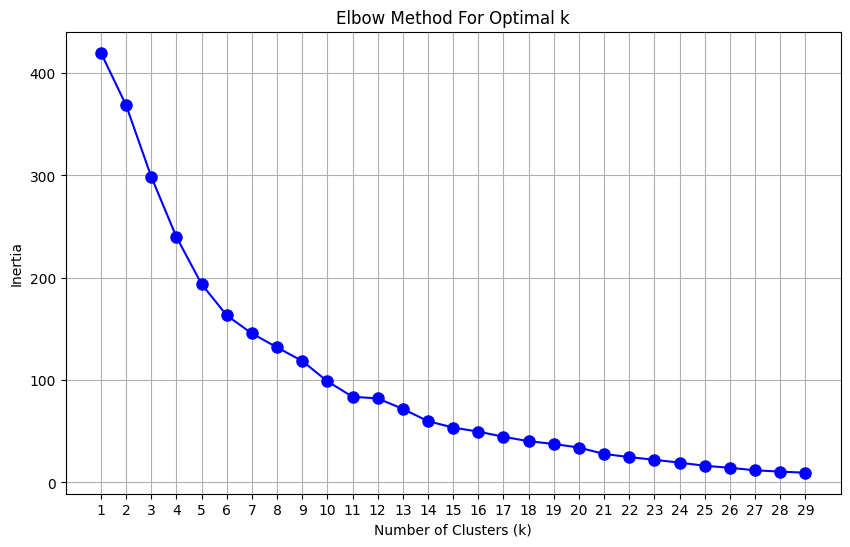

In [ ]:
# Applying the Elbow Method
inertia = []
k_range = range(1, 30)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=1624)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Visualization of the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [ ]:
# Apply k-means clustering
kmeans = KMeans(n_clusters=7, random_state=1624)
kmeans.fit(X)
labels = kmeans.labels_

# Add the cluster labels to the DataFrame
skill_features['KMeans_Clusters_opt'] = labels

# Group and display results
grouped = skill_features.groupby("KMeans_Clusters_opt")
for name, group in grouped:
    print(f"\nCluster {name}:")  
    print(f"Number of skills in cluster: {len(group)}")  
    print("Skills:")
    print(group.index.tolist())


Cluster 0:
Number of skills in cluster: 3
Skills:
['Java', 'C++', 'Client Relations']

Cluster 1:
Number of skills in cluster: 8
Skills:
['Excel', 'Data Management', 'Modeling', 'Reporting', 'Collaboration', 'Communication', 'Leadership', 'Problem Solving']

Cluster 2:
Number of skills in cluster: 14
Skills:
['R', 'Big Data', 'Machine Learning', 'Data Cleaning', 'Data Mining', 'Data Wrangling', 'ETL', 'Risk Management', 'Project Management', 'Consulting', 'Negotiation Skills', 'Business Intelligence', 'Decision Making', 'Budgeting']

Cluster 3:
Number of skills in cluster: 2
Skills:
['Matlab', 'Feature Engineering']

Cluster 4:
Number of skills in cluster: 4
Skills:
['Tableau', 'PowerBI', 'VBS', 'Data visualization']

Cluster 5:
Number of skills in cluster: 8
Skills:
['Teamwork', 'Creativity', 'Conflict Resolution', 'Presentation', 'Adaptability', 'Critical Thinking', 'Interpersonal Skills', 'Time Management']

Cluster 6:
Number of skills in cluster: 3
Skills:
['Python', 'SAS', 'SQL']

In [ ]:
# Create a dictionary with the clusters
courses = {
   # Core programming fundamentals grouped together
   # Reasoning: Essential foundation for data science
   "Programming & Database Fundamentals": [
       "Python", 
       "SQL", 
       "Java"
   ],
   
   # All visualization tools combined
   # Reasoning: Better to learn visualization tools together
   "Data Visualization & Reporting": [
       "Tableau",
       "PowerBI",
       "Data visualization",
       "Reporting"
   ],
   
   # Advanced analytics tools and concepts
   # Reasoning: Natural progression from basic programming
   "Advanced Data Analytics": [
       "R",
       "Machine Learning", 
       "Feature Engineering"
   ],
   
   # Data preprocessing and management skills
   # Reasoning: Critical skills for any data project
   "Data Management & ETL": [
       "Data Management",
       "ETL",
       "Data Cleaning",
       "Data Wrangling"
   ],
   
   # Business-focused analytical skills
   # Reasoning: Bridge between technical and business aspects
   "Business Intelligence & Decision Making": [
       "Business Intelligence",
       "Decision Making",
       "Modeling",
       "Risk Management"
   ],
   
   # Soft skills and project management
   # Reasoning: Essential for career progression
   "Project Management & Communication": [
       "Project Management",
       "Communication",
       "Leadership",
       "Collaboration"
   ],
   
   # Specialized programming tools
   # Reasoning: More advanced programming needs
   "Advanced Programming": [
       "C++",
       "Matlab",
       "SAS"
   ],
   
   # Big data technologies and tools
   # Reasoning: Modern data science requirements
   "Data Mining & Big Data": [
       "Big Data",
       "Data Mining",
       "Excel",
       "VBS"
   ],
   
   # Business and consulting skills
   # Reasoning: Important for client-facing roles
   "Business Consulting & Management": [
       "Consulting",
       "Negotiation Skills",
       "Client Relations", 
       "Budgeting"
   ],
   
   # Practical application and problem solving
   # Reasoning: Capstone-style course for practical experience
   "Problem Solving & Practice": [
       "Problem Solving",
       "Data Mining",
       "Data Management"
   ]
}

# Print formatted curriculum
print("Data Science Course Curriculum:\n")
for course_name, skills in courses.items():
   print(f"{course_name}:")
   print("Skills covered:")
   for skill in skills:
       print(f"- {skill}")
   print(f"Number of skills: {len(skills)}")
   print()

# Additional Statistics
print("Curriculum Statistics:")
total_skills = sum(len(skills) for skills in courses.values())
avg_skills = total_skills / len(courses)
print(f"Total number of courses: {len(courses)}")

Data Science Course Curriculum:

Programming & Database Fundamentals:
Skills covered:
- Python
- SQL
- Java
Number of skills: 3

Data Visualization & Reporting:
Skills covered:
- Tableau
- PowerBI
- Data visualization
- Reporting
Number of skills: 4

Advanced Data Analytics:
Skills covered:
- R
- Machine Learning
- Feature Engineering
Number of skills: 3

Data Management & ETL:
Skills covered:
- Data Management
- ETL
- Data Cleaning
- Data Wrangling
Number of skills: 4

Business Intelligence & Decision Making:
Skills covered:
- Business Intelligence
- Decision Making
- Modeling
- Risk Management
Number of skills: 4

Project Management & Communication:
Skills covered:
- Project Management
- Communication
- Leadership
- Collaboration
Number of skills: 4

Advanced Programming:
Skills covered:
- C++
- Matlab
- SAS
Number of skills: 3

Data Mining & Big Data:
Skills covered:
- Big Data
- Data Mining
- Excel
- VBS
Number of skills: 4

Business Consulting & Management:
Skills covered:
- Consu

#This PCA + K-means clustering visualization with 7 clusters (0-6) reveals distinct skill groupings in the data science domain. The plot shows clear separation between different skill categories:
Cluster 0 (Pink circles) in the lower left represents core programming skills. Cluster 1 (Blue squares) in the upper left shows business and soft skills, tightly grouped together. Cluster 2 (Green triangles) spread across the center suggests data processing and analytics skills. Cluster 3 (Orange diamonds) in the upper right indicates specialized technical skills. Cluster 4 (Pink triangles) in the lower portion likely represents visualization tools. Cluster 5 (Light blue pentagons) in the center-right shows intermediate technical skills. Cluster 6 (Stars) scattered in the left-center might represent hybrid skills combining technical and business aspects.
The first principal component (x-axis) appears to separate technical from business skills, while the second component (y-axis) might indicate skill complexity or specialization level.

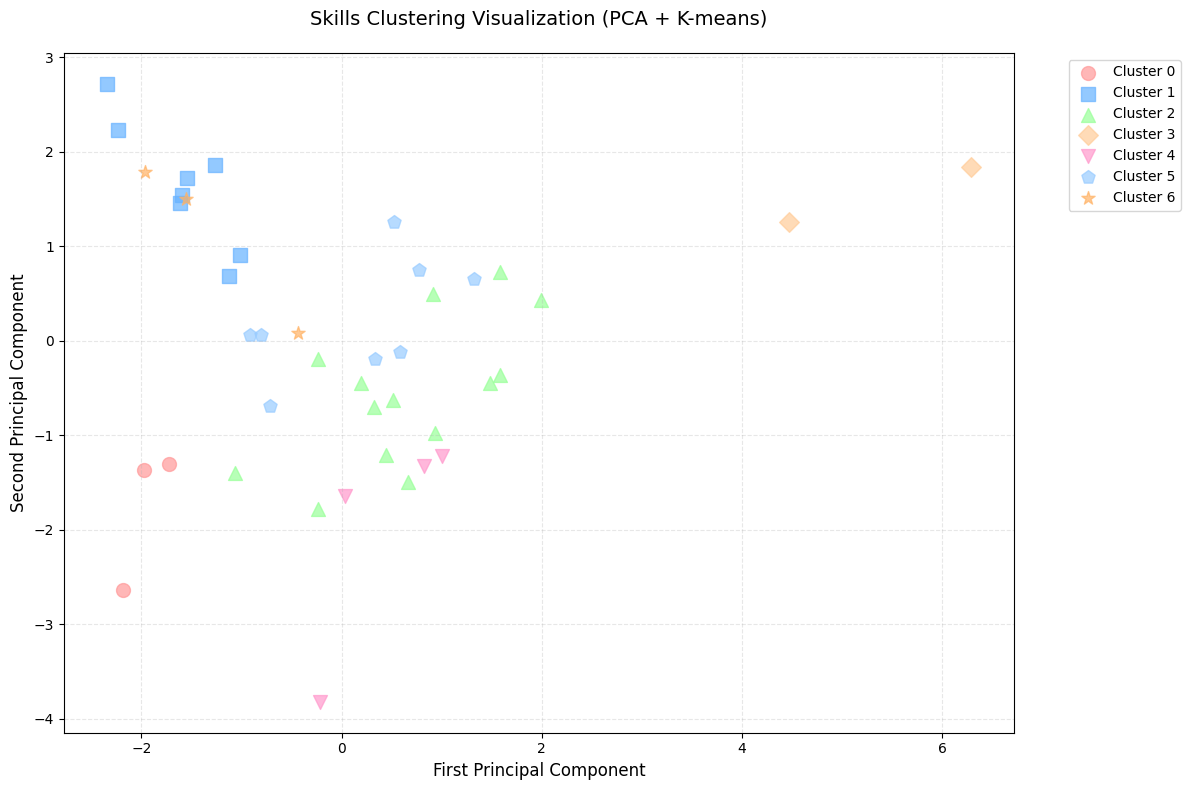

In [ ]:
# 1. Apply KMeans clustering with k=7
kmeans = KMeans(n_clusters=7, random_state=1624)
labels = kmeans.fit_predict(X)

# 2. Apply PCA for dimensionality reduction to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 3. Create scatter plot
plt.figure(figsize=(12, 8))

# Set different colors and markers for clusters
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC', '#99CCFF', '#FFB366'] 
markers = ['o', 's', '^', 'D', 'v', 'p', '*']  

# Plot scatter points for each cluster
for i in range(7):  
    # Get points for current cluster
    mask = labels == i
    
    # Create scatter plot
    plt.scatter(X_pca[mask, 0], 
                X_pca[mask, 1],
                c=colors[i], 
                marker=markers[i],
                label=f'Cluster {i}',
                s=100,  # point size
                alpha=0.7)  # transparency

# Add title and labels
plt.title('Skills Clustering Visualization (PCA + K-means)', fontsize=14, pad=20)
plt.xlabel('First Principal Component', fontsize=12)
plt.ylabel('Second Principal Component', fontsize=12)

# Add legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Add grid
plt.grid(True, linestyle='--', alpha=0.3)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# 5.Interpretation of results using ChatGPT API:

#### ChatGPT prompt

In [ ]:
prompt_1 = 'Write your prompt here: {input}'

In [ ]:
prompt1 = prompt_1.format(input=input_skills)
print(prompt1)

Write your prompt here: Course 1: Modeling, SQL, Python, Leadership, Communcation, Excel; Course 2: Data Cleaning, Data Wrangling, Data Mining, Big Data, Feature Engineering, Matlab, C++, VBS; Course 3: Reporting, Presentation, SAS, Data Management; Course 4: Machine Learning, R, Team Work; Course 5: Conflict Resolution, Budgeting, Client Relations; Course 6: Consulting, Project Management, Time Management; Course 7: PowerBI, Tableau, Creativity, Data Visualization; Course 8: Negotiation Skills, Critical Thinking, Risk Management, Adaptability, ETL, Business Intelligence, Decision Making


In [ ]:
## Call OpenAI API for the first prompt
response1 = client.chat.completions.create(
  model = model,
  messages = [
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": prompt1}
  ]
)

In [ ]:
output1 = response1.choices[0].message.content
print(output1)

It looks like you have a list of courses covering a wide range of skills related to data, business, and personal development. Here’s a structured overview of these courses, categorized by themes, along with the skills and tools associated with each course:

### Course Overview

#### Data Analysis and Programming
- **Course 1**: 
  - Skills/Tools: Modeling, SQL, Python, Excel
- **Course 2**: 
  - Skills/Tools: Data Cleaning, Data Wrangling, Data Mining, Big Data, Feature Engineering, Matlab, C++, VBS
- **Course 3**: 
  - Skills/Tools: Reporting, Presentation, SAS, Data Management
- **Course 4**: 
  - Skills/Tools: Machine Learning, R, Team Work

#### Business and Management Skills
- **Course 5**: 
  - Skills/Tools: Conflict Resolution, Budgeting, Client Relations
- **Course 6**: 
  - Skills/Tools: Consulting, Project Management, Time Management

#### Data Visualization and Business Intelligence
- **Course 7**: 
  - Skills/Tools: PowerBI, Tableau, Creativity, Data Visualization
- **Cours

# Part6. Discussion and final course curriculum
#### Course 1: Foundations of Data Science and Programming
- **Topics Covered:**
  - Modeling
  - SQL (Structured Query Language)
  - Python Programming
  - Excel for Data Analysis
  - Justification: This introductory course establishes the essential programming and data manipulation skills necessary for any data science professional. By covering Python, SQL, Excel, students gain proficiency in the most widely used tools in the industry. This foundational knowledge is critical for data extraction, manipulation, and basic analysis tasks.

#### Course 2: Advanced Data Techniques
- **Topics Covered:**
  - Data Cleaning
  - Data Wrangling
  - Data Mining Techniques
  - Big Data Concepts
  - ETL (Extract, Transform, Load) Processes
  - Feature Engineering
  - Justification: This course delves into the techniques of preparing and managing data for analysis. Students learn how to handle real-world data, which is often messy and unstructured. Understanding ETL processes and data management is crucial for efficiently handling large datasets and ensuring data integrity.

#### Course 3: Data Visualization and Creativity
- **Topics Covered:**
  - Power BI for Data Visualization
  - Tableau for Interactive Dashboards
  - Creativity in Data Presentation
  - Visual Basic Script (VBS)
  - Presentation
  - Justification:This course teaches students how to transform data into visual insights. By combining visualization tools (Tableau, PowerBI) with skills presentation, students learn to communicate data findings effectively.

#### Course 4: Machine Learning and Team Dynamics
- **Topics Covered:**
  - Machine Learning Algorithms
  - R Programming
  - Team Work
  - Justification: This course delves into statistical analysis and predictive modeling. It combines skills from both clusters related to modeling and machine learning, using R as the primary tool. Students learn to build and refine models, incorporating team work to present their finding.

### Course 5: Project Management and Consulting Skills
- **Topics Covered:**
  - Project Management
  - Consulting
  - Time Management
  - Client Relations
  - Budgeting
  - Justification: This course equips students with the soft skills necessary for successful project execution and client interaction. It combines clusters related to consulting and project management, emphasizing the importance of planning, budgeting, and effective communication with stakeholders.

#### Course 6: Leadership and Team Collaboration
- **Topics Covered:**
 - Leadership
 - Communication
 - Collaboration
 - Adaptability
 - Justification: Focusing on interpersonal skills, this course prepares students to community and collaborate effectively. It addresses common workplace challenges which emphasizes adaptability in diverse team environments.

#### Course 7: Advanced Programming for Data Science
- **Topics Covered:**
 - C++
 - JAVA
 - SAS
 - Justification: For students aiming to specialize in the computational aspects of data science, this course offers advanced programming skills. Learning languages like C++ and Java enables students to optimize performance, handle complex computations, and integrate data science solutions with existing systems.

#### Course 8: Business Intelligence and Decision Making
- **Topics Covered:**
  - Business Intelligence
  - Decision Making
  - Risk Management
  - Critical Thinking
  - Justification: Bridging technical and business domains, this course focuses on using data to drive business decisions. It emphasizes critical thinking and adaptability, preparing students to handle real-world challenges in business intelligence and risk management.

# 7[Bonus]. OpenAI to describe clustering results

#### Course 9: Advanced Statistical Methods and Mathematical Foundations
- **Topics Covered:**
  - Advanced Probability Theory
  - Statistical Inference
  - Time Series Analysis
  - Optimization Techniques
  - Linear Algebra and Calculus for Data Science

#### Course 10: Cloud Computing and Big Data Technologies
- **Topics Covered:**
  - Cloud Computing Fundamentals
  - Big Data Ecosystems (Hadoop, Spark)
  - Distributed Computing
  - Cloud Services (AWS, Azure, Google Cloud)

#### Course 11: Ethics, Privacy, and Legal Issues in Data Science
- **Topics Covered:**
  - Data Ethics Principles
  - Responsible AI Practices
  - Data Security and Protection

#### Course 12: Domain-Specific Data Science Applications
- **Topics Covered:**
  - Healthcare Data Analytics
  - Financial Data Modeling
  - Marketing and Customer Analytics
  - Environmental Data Science

In [ ]:
%pip install openai==0.28.1

  Attempting uninstall: openai
    Found existing installation: openai 1.54.4
    Uninstalling openai-1.54.4:
      Successfully uninstalled openai-1.54.4
Note: you may need to restart the kernel to use updated packages.


In [27]:
job_descriptions = results['Description']

In [34]:
def get_embedding(text, model='text-embedding-ada-002'):
    response = openai.Embedding.create(input=text, model=model)
    return np.array(response['data'][0]['embedding'])

def create_curriculum_from_jobs(job_descriptions, num_clusters=8, random_state=42):
    # Step 1: Generate embeddings
    print("Generating embeddings...")
    embeddings = []
    for text in job_descriptions:
        try:
            embedding = get_embedding(text)
            embeddings.append(embedding)
        except Exception as e:
            print(f"Error generating embedding: {e}")
            # Add a zero vector of the same dimension as valid embeddings
            # Only if we have at least one successful embedding to reference
            if embeddings:
                embeddings.append(np.zeros_like(embeddings[0]))
            
    # Convert to numpy array and ensure all rows are present
    embeddings_matrix = np.vstack(embeddings)
    
    # Verify dimensions
    if len(embeddings_matrix) != len(job_descriptions):
        raise ValueError(f"Mismatch in dimensions: {len(embeddings_matrix)} embeddings vs {len(job_descriptions)} descriptions")
    
    # Step 2: Perform clustering
    print("Performing clustering...")
    kmeans = KMeans(n_clusters=num_clusters, random_state=random_state)
    cluster_labels = kmeans.fit_predict(embeddings_matrix)
    
    # Create a DataFrame with both descriptions and cluster labels
    df = pd.DataFrame({
        'Description': job_descriptions,
        'Cluster': cluster_labels
    })
    
    # Step 3: Generate curriculum
    print("Generating curriculum...")
    curriculum = {}
    for cluster_num in range(num_clusters):
        # Use boolean indexing on the DataFrame
        cluster_mask = df['Cluster'] == cluster_num
        cluster_jobs = df[cluster_mask]
        
        if not cluster_jobs.empty:
            # Take up to 5 descriptions as sample skills
            key_skills = "\n- ".join(cluster_jobs['Description'].head(5))
            curriculum[f'Cluster {cluster_num + 1}'] = f"Core Topics:\n- {key_skills}"
    
    return curriculum, df

Generating embeddings...
Error generating embedding: Request timed out: HTTPSConnectionPool(host='api.openai.com', port=443): Read timed out. (read timeout=600)
Error generating embedding: Request timed out: HTTPSConnectionPool(host='api.openai.com', port=443): Read timed out. (read timeout=600)
Error generating embedding: Object of type ndarray is not JSON serializable
Performing clustering...
Generating curriculum...

Generated Curriculum:

Cluster 1:
Core Topics:
- A career as an Analyst or Associate in the Global Securities Finance (GSF) Delta-One team at National Bank of Canada (NBC) would involve assisting in the pricing, trading, hedging, and booking of equity Delta-One products. It would also involve developing related trading strategies, building the necessary infrastructure, implementing and managing those strategies. Candidates should have a keen interest in trading a diverse range of financial products and underpinnings of capital markets including operations, and financial

In [ ]:
curriculum, clustered_jobs = create_curriculum_from_jobs(job_descriptions)